<a href="https://colab.research.google.com/github/Snigdha-Gayathri/Data-Mining/blob/main/DLEXP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.5080 - loss: 431.2923 - val_accuracy: 0.5036 - val_loss: 1.5361
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4969 - loss: 18.3852 - val_accuracy: 0.4999 - val_loss: 0.7209
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5024 - loss: 3.7726 - val_accuracy: 0.5002 - val_loss: 0.7035
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5045 - loss: 2.0549 - val_accuracy: 0.5044 - val_loss: 0.6935
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5033 - loss: 1.4613 - val_accuracy: 0.5057 - val_loss: 0.6935
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4976 - loss: 1.1583 - val_accuracy: 0.5047 - val_loss: 0.6937
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4981 - loss: 1.1115 - val_accuracy: 0.5008 - val_loss: 0.6938
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5004 - loss: 1.0551 - val_accurac

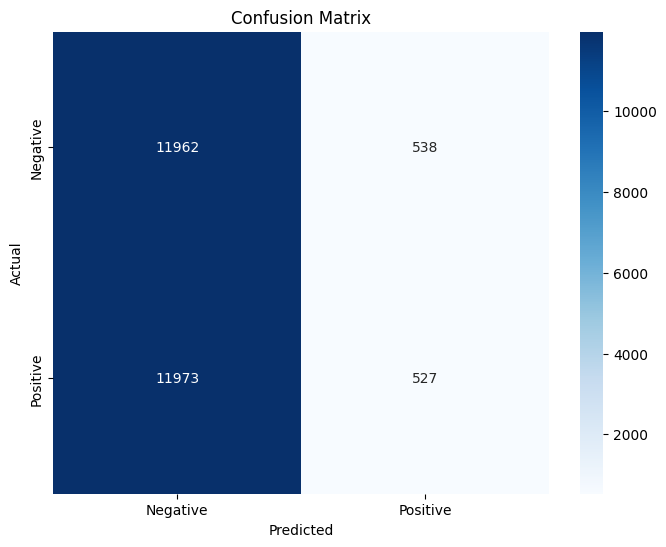

In [ ]:
# Import necessary libraries
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)


# Preprocess the data
maxlen = 200
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)


# Define the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(maxlen,)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))



# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=128)

# Evaluate the model on test data
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

from sklearn.metrics import classification_report
# Predict class labels for the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Generate and print classification report
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"],
yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()